# Lab 5 - Michelson Interferometer

**EE/PHY 450/550**

**Scott Prahl**

**April 2018**

In [1]:
# Execute these lines before starting the notebook
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

# Background

The Michelson interferometer is the most commonly used interferometer (notice that light enters from the wrong side in the picture below!).  It is simple, sensitive and relatively easy to adjust.  You will use the interferometer to measure the wavelength of a a Helium Neon laser as well as the two wavelengths emitted by a low-pressure sodium lamp.

<img src="http://omlc.org/~prahl/host/450/week5/michelsoninterferometer004.png" width="50%">

The Michelson interferometer has a 50:50 non-polarizing plate beam splitter, a tilting mirror, a translating mirror, and a compenation plate.  **Identify each of these before continuing.**

<img src="http://omlc.org/~prahl/host/450/week5/michelson.png" width="40%">

The half-silvered mirror shown above is made of glass with a thin layer of metal applied to one glass surface.  

The figure above shows laser light hitting the beam splitter.  Half the light continues to the translating mirror and half is reflected to the mirror at the top.  Both beams bounce back from the mirrors and are then recombined at the diffuse glass screen.  If the difference in distances between the two paths is less than the coherence length of the light source, then interference effects may be observed.

The translatable mirror uses a micrometer to move the mirror.  However, instead directly moving the mirror, the micrometer moves the long arm of a lever.  The result is that the mirror moves only 1/5th as far as the micrometer does.

## Low Pressure Sodium Lamps

Low pressure sodium lamps emit light primarily at two wavelengths that correspond to the two sodium D transitions shown above. The emitted light is more or less equally divided between $\lambda_1=589.0$nm and $\lambda_2=589.6$nm. 

<img src="http://omlc.org/~prahl/host/450/week5/slide_3.png" width="30%">

from http://images.slideplayer.com/16/5196196/slides/slide_3.jpg

Low pressure sodium lamps are nearly monochromatic but have a slight range of wavelengths (less than 1nm) due to movement of the sodium ions.  High pressure sodium lamps have a much broader spectrum (100's of nm instead of 1nm) due to more frequent collisions.

## Two beam interference
The two wavelengths are very close together.  These would be very difficult to resolve with a prism or grating spectrometer, but are readily measured using a Michelson interferometer by observing the beat frequencies between the two wavelengths.

Recall that a plane wave can be written as
$$
E_\mathrm{plane}(z)=E_0 e^{j (k z-\omega t)}
$$
where $k=2\pi/\lambda$, $z$ is the total distance travelled, and we will ignore the temporal component $e^{j\omega t}$ from now on.

With the HeNe, you will be observing the sum plane waves that have travelled distances $z$ and $z+\Delta z$
$$
E_\mathrm{sum}(z)=E_\mathrm{plane}(z)+E_\mathrm{plane}(z+\Delta z)
$$
You will change $\Delta z$ when you move the mirror.

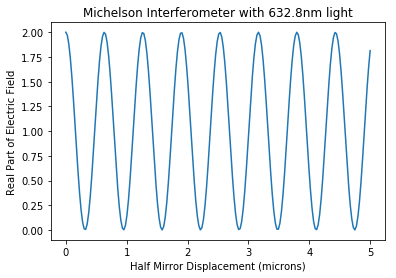

In [2]:
def Eplane(k,z):
    return np.exp(1j*k*z)

z=0  # doesn't matter
Lambda = 632.8 * 1e-9;
dz = np.linspace(0,5,200)*1e-6
k = 2*np.pi/Lambda

Esum = Eplane(k,z)+Eplane(k,z+dz)

plt.plot(dz*1e6,Esum.real)
plt.xlabel("Half Mirror Displacement (microns)")
plt.ylabel("Real Part of Electric Field")
plt.title("Michelson Interferometer with 632.8nm light")
plt.show()

The intensity is (if $I_0=E_0^2/2$)
$$
I(\Delta z) = I_0(e^{i k z} + e^{i k (z+\Delta z)})(e^{-i k z} + e^{-i k (z+\Delta z)})
$$
and because this is so simple, books usually follow with a bit more derivation to get
$$
I(\Delta z) = I_0 (2+2 \cos(k \Delta z))
$$

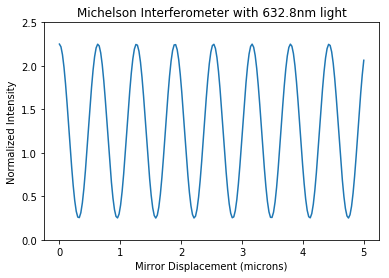

In [3]:
Esum = Eplane(k,z)+ 2*Eplane(k,z+dz)

I = abs(Esum)**2/4

plt.plot(dz*1e6,I)
plt.xlabel("Mirror Displacement (microns)")
plt.ylabel("Normalized Intensity")
plt.title("Michelson Interferometer with 632.8nm light")
plt.ylim(0,2.5)
plt.show()

### Four beam interference

When you use the low pressure sodium lamp, you will be observing the sum of four waves (two for each wavelength!)
$$
E(\Delta z) = {E_0\over4}\left[ e^{i k_1 z} +  e^{i k_1(z+\Delta z)} +  e^{ik_2 z} +  e^{ik_2(z+\Delta z)}\right]
$$
where $k_1=2\pi/\lambda_1$, $k_2=2\pi/\lambda_2$, $z$ is the total distance travelled in one arm, and $\Delta z$ is the net difference in distance along the other arm.  

The intensity is a complicated formula, but it can easily be plotted

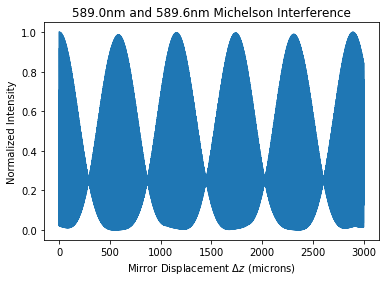

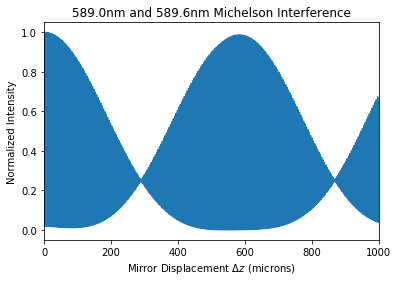

In [12]:
z=0  # doesn't really matter
sodium1 = 589.0 * 1e-9;
sodium2 = 589.6 * 1e-9;

k1 = 2*np.pi/sodium1
k2 = 2*np.pi/sodium2

dz = np.linspace(0,3000,8000)*1e-6

Esum4 = (Eplane(k1,z)+Eplane(k1,z+dz)+Eplane(k2,z)+Eplane(k2,z+dz))/4
I4 = abs(Esum4)**2

plt.plot(dz*1e6,I4)
plt.xlabel("Mirror Displacement $\Delta z$ (microns)")
plt.ylabel("Normalized Intensity")
plt.title("589.0nm and 589.6nm Michelson Interference")
plt.show()

plt.plot(dz*1e6,I4)
plt.xlabel("Mirror Displacement $\Delta z$ (microns)")
plt.ylabel("Normalized Intensity")
plt.title("589.0nm and 589.6nm Michelson Interference")
plt.xlim(0,1000)
plt.show()

#### Carrier Frequency

If we zoom in, then we can observe a high-frequency carrier wave modulated by a low-frequency beat wave.  The spatial frequency of the carrier wave is
$$
k_\mathrm{carrier} = {k_1+k_2\over2}
$$
It is easy to verify this result by plotting the four-wave signal and the carrier signal 

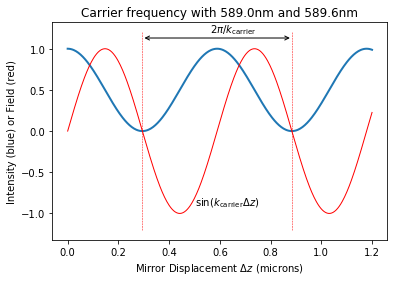

In [5]:
z=0
kcarrier = (k1+k2)/2
beat = (2*np.pi/kcarrier)*1e6

dz = np.linspace(0,1.2,400)*1e-6
Esum4 = (Eplane(k1,z)+Eplane(k1,z+dz)+Eplane(k2,z)+Eplane(k2,z+dz))/4
I4 = abs(Esum4)**2

plt.plot(dz*1e6, I4, linewidth=2)
plt.plot(dz*1e6,np.sin(kcarrier*dz),color='red', linewidth=1)

plt.annotate(s='', xy=(0.5*beat,1.13), xytext=(1.5*beat,1.13), arrowprops=dict(arrowstyle='<->'))
plt.annotate(s='$2\pi/k_\mathrm{carrier}$', xy=(0.95*beat,1.2))
plt.plot([0.5*beat, 0.5*beat], [-1.2, 1.2], color='red', linestyle='--', linewidth=0.5)
plt.plot([1.5*beat, 1.5*beat], [-1.2, 1.2], color='red', linestyle='--', linewidth=0.5)
plt.annotate(s='$\sin(k_\mathrm{carrier}\Delta z)$', xy=(0.85*beat,-0.9))

plt.xlabel("Mirror Displacement $\Delta z$ (microns)")
plt.ylabel("Intensity (blue) or Field (red)")
plt.title("Carrier frequency with 589.0nm and 589.6nm")
plt.show()

If the mirror moves by $\Delta z_\mathrm{carrier}$ to go from one fringe to the next then
$$
2\Delta z_\mathrm{carrier}={2\pi\over k_\mathrm{carrier}}
$$
since the pathlength changes by $2\Delta z_\mathrm{carrier}$. Simplifying
$$
k_\mathrm{carrier} = {\pi\over \Delta z_\mathrm{carrier}}
$$

#### Beat Frequency

If one looks at the prior graph that shows interference over a much greater range of mirror displacements, then there is a low-frequency beat wave characterized by
$$
k_\mathrm{beat} = \frac{k_1-k_2}{2}
$$
This is a quite different observable effect.  At places where the signal quiets down, the interference fringes disappear.  *It is much easier and less error prone to use where the fringes disappear than to use when the contrast is highest --- why?* 

By measuring the mirror displacement $z_\mathrm{beat}$ needed to go from one disappearing fringe to the next, then
$$
2\Delta z_\mathrm{beat}={2\pi\over k_\mathrm{beat}}
$$
since the pathlength $\Delta z$ changes by $2\Delta z_\mathrm{beat}$. Therefore
$$
k_\mathrm{beat} = {\pi\over \Delta z_\mathrm{beat}}
$$
We can verify this empirically by plotting the interference pattern and $\cos(k_\mathrm{beat} z)$ to see that the overall minima line up.  

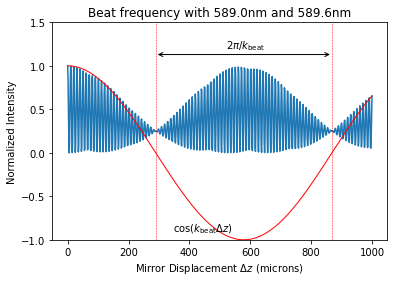

In [17]:
z=0
kbeat = (k1-k2)/2
beat = (np.pi/kbeat)*1e6 

dz = np.linspace(0,1000,800)*1e-6
Esum4 = (Eplane(k1,z)+Eplane(k1,z+dz)+Eplane(k2,z)+Eplane(k2,z+dz))/4
I4 = abs(Esum4)**2

plt.plot(dz*1e6,I4)
plt.plot(dz*1e6,np.cos(kbeat*dz), color='red',linewidth=1)

# show one period of the field at the beat frequency
plt.annotate(s='', xy=(0.5*beat,1.13), xytext=(1.5*beat,1.13), arrowprops=dict(arrowstyle='<->'))
plt.annotate(s='$2\pi/k_\mathrm{beat}$', xy=(0.9*beat,1.2))
plt.axvline(0.5*beat, color='red', linestyle='--', linewidth=0.5)
plt.axvline(1.5*beat, color='red', linestyle='--', linewidth=0.5)

plt.annotate(s='$\cos(k_\mathrm{beat}\Delta z)$', xy=(0.6*beat,-0.9))

plt.xlabel("Mirror Displacement $\Delta z$ (microns)")
plt.ylabel("Normalized Intensity")
plt.title("Beat frequency with 589.0nm and 589.6nm")
plt.ylim(-1,1.5)
plt.show()

#### Recovering $\lambda_1$ and $\lambda_2$

$$
{2\pi\over\lambda_1} = k_1= k_\mathrm{carrier}+{k_\mathrm{beat}\over 2}
$$
or
$$
{2\pi\over\lambda_1}= {\pi\over \Delta z_\mathrm{carrier}}+{\pi\over 2\Delta z_\mathrm{beat}}
$$
or
$$
\lambda_1= \left({1\over 2\Delta z_\mathrm{carrier}}+{1\over 4\Delta z_\mathrm{beat}}\right)^{-1}
$$
Similarly
$$
\lambda_2= \left({1\over 2\Delta z_\mathrm{carrier}}-{1\over 4\Delta z_\mathrm{beat}}\right)^{-1}
$$


## Coherence Length

Coherence length describes the distance over which light retains a predictable phase relation.  One of the challenges in a Michelson interferometer is getting the distances between the beam splitter and the mirrors exactly the same.  (The other is getting the image of one mirror and the virtual image of the other mirror absolutely parallel to each other.)

<table>
<tr><td>Source      </td><td>$\lambda$</td><td> $\Delta\nu$ </td><td> $d$  </td></tr>
<tr><td>            </td><td> nm      </td><td> GHz         </td><td> mm   </td></tr>
<tr><td>HeNe        </td><td> 632.8   </td><td> 1.5         </td><td> 200  </td></tr>
<tr><td>Na          </td><td> 589     </td><td> 510         </td><td> 0.6  </td></tr>
<tr><td>White Light </td><td> 400-800 </td><td> 300,000     </td><td> 0.001</td></tr>
</table>

The spectral width of laser lines is usually given in terms of frequency $\Delta\nu=c/\lambda_1 - c/(\lambda +\Delta\lambda)$ where $\Delta\lambda$ is the spectral width in terms of meters.  The table above provides a few useful bandwidths.  


## Mirror Movement

<img src="http://omlc.org/~prahl/host/450/week5/microm3.png" width="25%">

You use a micrometer to move the translatable mirror.  Misreading the micrometer is a major failure point for this lab.  The micrometer will spin twice for every millimeter of travel &mdash; the marks below the line track this extra turn.  **Try it.  Make sure you understand this.**

The micrometer has ticks every 0.010mm but with care you can easily measure to a fraction of a full tick (0.002mm). Consequently, you will record all your measurements in millimeters with three decimal places, e.g., 15.236mm.  

Spend a bit of time now making sure that everyone can read the micrometer.  Have one person set the micrometer to a value and make sure everyone can read the micrometer setting to three decimal places.

The interferometer mirror is not directly moved by the micrometer; instead, the micrometer pushes on the long side of a lever whose other end moves the mirror.  The mechanical lever reduces the movement by a factor of five.  Thus moving the micrometer by 0.005mm will displace the mirror by 0.001mm).

Notice the <a href="https://www.youtube.com/watch?v=NqF_ETWvBCA">backlash</a> in the translating mirror mechanism.  All your measurements should end with you turning the micrometer in the same direction.  *This small effect is sufficient to destroy any hopes of getting consistent measurements.*

# Pre-lab Questions

### Problem 1
Explain what the mirror displacement graph shown above means —  what exactly will you observe?

---
## <span style="color:red">Student Answer</span>

*Double-click and add your answer between the lines*

---

### Problem 2
How far does the mirror move for one fringe and why?

---
## <span style="color:red">Student Answer</span>

*Double-click and add your answer between the lines*

---

### Problem 3
What is the micrometer set to in the figure above?

---
## <span style="color:red">Student Answer</span>

*Double-click and add your answer between the lines*

---

### Problem 4
If the micrometer moves from 16.385mm to 16.355mm over twenty fringes, how far does the mirror move per fringe and what is the wavelength? (Don't forget about the lever!)

In [7]:
m = 20
d1 = 16.385e-3  # m
d2 = 16.355e-3  # m

# YOUR CODE HERE
raise NotImplementedError()

print("The mirror moved %.0f nm per fringe" % nm_per_fringe)
print("which corresponds to a wavelength of %.0f nm" % lambda0)

The mirror moved 300 nm per fringe
which corresponds to a wavelength of 600 nm


### Problem 5
Which side of the half-silvered beam splitter should be 50% reflective?

---
## <span style="color:red">Student Answer</span>

*Double-click and add your answer between the lines*

---

### Problem 5
Explain the need for the glass plate.  Why is it angled?

---
## <span style="color:red">Student Answer</span>

*Double-click and add your answer between the lines*

---

### Problem 6
What fraction of the incident light will end up at the viewing plate (assuming no losses at mirrors and perfect alignment)?

---
## <span style="color:red">Student Answer</span>

*Double-click and add your answer between the lines*

---

### Problem 7
Redraw the schematic showing the actual path of the beam through the Michelson interferometer.  

* The schematic should be a top view
* Make the beam splitter and compensator sufficiently thick to show the internal beams
* Include bending of light due to refraction
* Assume that the beam splitter is at 45°
* Only reflect from appropriate side of the half-silvered beam splitter.  

**Don't bother doing the lab until you have done this problem.**

Obviously, not a top view.  But this is a picture of the famous Michelson-Morley interferometer floating on a moat of mercury!

<img src="https://upload.wikimedia.org/wikipedia/commons/f/f4/Michelson_morley_experiment_1887.jpg" width="50%">

---
## <span style="color:red">Student Answer</span>

*Double-click and add your answer between the lines*

---

### Problem 8
How many passes does the light make through glass does each beam make before exiting the interferometer?

---
## <span style="color:red">Student Answer</span>

*Double-click and add your answer between the lines*

---

### Problem 9
When the sodium lamp is used, how far must the translatable mirror move to shift from one beat minimum to the next?  How many fringes is this?** Answer: 0.289mm, 982

In [8]:
lambda1 = 589.0e-9
lambda2 = 589.6e-9

# YOUR CODE HERE
raise NotImplementedError()

The mirror must move 579 microns from one beat minimum to the next
This corresponds to 982 fringes


# Experiment

Be extremely careful with the optical elements.  Take your time and keep your dagburned fingers off the optical surfaces.  Let me know if accidently touch a surface so that I can clean the optic.  If your finger oils remain on the surface, it can cause permanent damage.

When the path lengths are different and the mirrors not parallel, hyperbolic fringes will be seen.  By carefully adjusting the tiltable mirror, you can obtain centered linear (for a collimated laser beam) or circular fringes (from the low pressure sodium lamp).  At this point the mirrors are parallel, but the two arms of the interferometer may be unequal.  

## HeNe
With the beam splitter in place, adjust the HeNe laser so it is parallel to the table and hits the center of the untiltable (i.e., the translation) mirror.  Adjust the laser beam so that it is perpendicular to the this mirror. 

Use a 10X or 20X objective to magnify the output of the interferometer.  Adjust the tiltable mirror so that the two beams overlap.  There are a bunch of reflected beams, so make sure that you are making the correct spots overlap.  The fringes will be linear.  (why?)

Plug the sodium lamp in to allow it to warm up just before you start counting fringes.

Use the translatable mirror to measure the distance that corresponds to fifty fringes.  Do this five times.  Keep increasing so that you can plot fringes on along the x-axis of a plot and position as a y-coordinate.
(Why are you doing this?)

## Low Pressure Sodium Lamp

Now use the sodium lamp. Since the spectrum of sodium light consists primarily of two closely spaced lines, you will see fringes at the sum and difference of the wavenumber.  Your goal will be to empirically determine $\lambda_1$ and $\lambda_2$ by measuring the finely spaced fringes and the overall beat pattern.  

It is much more challenging to get good interference patterns with the sodium lamp, so take your time adjusting the lamp placement and mirror alignment.  Place beam blocks so that the sodium light enters the interferometer only at the entrance and position the sodium lamp so that the untiltable mirror is uniformly illuminated.  

Use a diffuser in the holder just before light enters the interferometer.  This will help you avoid looking at the sodium lamp's physical appearance *and* improve fringe contrast.

Since the interferometer was aligned with the HeNe, you should see some fringes immediately.  Because the sodium light is so much weaker, you will need to look into the interferometer (focus your eyes on the tiltable mirror) to see the fringes.  The fringes will be circular (why?).

By moving the translatable mirror so that the fringes collapse into the center, you will be able to reduce the number of circular fringes visible (i.e, the fringes grow in thickness).  At some point the center fringe will fill the entire field and the two arms of the interferometer will be within a few wavelengths of each other in length.  (Continuing to move the mirror in the same direction will cause the fringes to emerge from the center.)  At this point the fringes should have the highest contrast.

Adjust the tiltable mirror so that the fringes are centered.  This adjustment is very sensitive and if you move too much the fringes will be completely lost.  Finally, if you are having no luck seeing any fringes, you might be at a null in the beat frequency.  Rotation of the micrometer a turn or two might cause the fringes to reappear.

Again count fifty fringes (5 times). Again, keep increasing the distance.  (Why?)

Notice that the contrast of the fringes changes as you translate the mirror.  To measure the beat frequency, you need to measure how far the mirror needs to travel from lowest contrast to lowest constrast.  Do this five times.

### 550 students
Translate the mirror so that the fewer fringes appear.  Ideally, you'll stop when there is just one and a half fringes visible. At this point the arms of the interferometer should be very close to identical in length and you might be able to observe white light fringes.

Now, replace the sodium lamp with a white light source.  Make small changes to the position of the translatable mirror.  When you are successful, you'll see something like

<img src="http://omlc.org/~prahl/host/450/week5/whitefringes.jpg" width="50%">



# Analysis

Report the wavelength and standard deviation for the HeNe laser.  Compare with accepted values.  Include a plot.

Report the average wavelength and standard deviation for the sodium lamp.  Compare with accepted values.  Include a plot.

Report the wavelength separation and standard deviation for the sodium lamp.  Compare with accepted values.  Include a plot.

**550 students** 
Include a picture of your white light fringes.

